In [1]:
import numpy as np

In [2]:
def file2matrix(filename):
    with open (filename, 'r') as f:
        fileList = f.readlines() # 返回文件内容的一个列表
        num_lines = len(fileList)
        num_facs = len(fileList[0].strip().split('\t')) - 1
        num_lab = 1
        print(num_lines, num_facs, num_lab)
        returnMatrix = np.zeros((num_lines, num_facs))# 文件的每一行数据中，前n-1是特征值，最后一个是标签
        returnLabel = np.zeros(num_lines)
        index = 0
        for line in fileList:
            line = line.strip().split('\t')
            returnMatrix[index, :] = line[:num_facs]
            returnLabel[index] = line[-1]
            index += 1
        return returnMatrix, returnLabel

查看前十个样本的特征值和标签

In [3]:
returnMatrix, returnLabel = file2matrix('datasets/datingTestSet2.txt')
print(returnMatrix[:10, :], returnLabel[:10])

1000 3 1
[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]
 [7.2993000e+04 1.0141740e+01 1.0329550e+00]
 [3.5948000e+04 6.8307920e+00 1.2131920e+00]
 [4.2666000e+04 1.3276369e+01 5.4388000e-01]
 [6.7497000e+04 8.6315770e+00 7.4927800e-01]
 [3.5483000e+04 1.2273169e+01 1.5080530e+00]] [3. 2. 1. 1. 1. 1. 3. 3. 1. 3.]


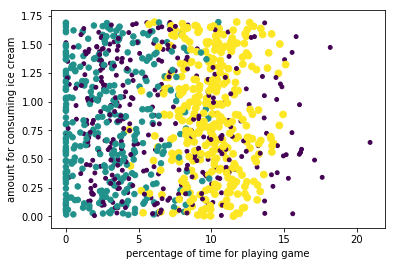

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(returnMatrix[:, 1], returnMatrix[:, 2], 15.0*returnLabel, 15.0*returnLabel)
plt.xlabel('percentage of time for playing game')
plt.ylabel('amount for consuming ice cream')
plt.show()

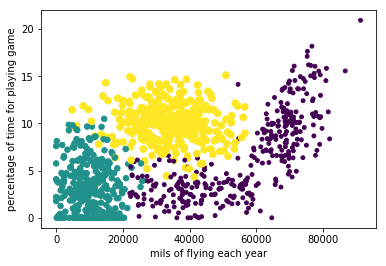

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(returnMatrix[:, 0], returnMatrix[:, 1], 15.0*returnLabel, 15.0*returnLabel)
plt.xlabel('mils of flying each year')
plt.ylabel('percentage of time for playing game')
plt.show()

在datingTestSet2.txt文件中，每年获得飞行常客里程数数值上远大于其它两个特征值，因此在计算距离公式时，该特征的形象将会被远远放大。我们希望三个特征值的同等重要，因此需要对数据进行归一化操作，使得数据的范围转换到[0, 1]之间，具体转换公式如下:
   $$
       newVal = \frac{oldVal - minVal}{maxVal - minVal}
   $$

In [6]:
def normData(dataSet):
    minVal = np.min(dataSet, 0)
    maxVal = np.max(dataSet, 0)
    return (dataSet - minVal) / (maxVal - minVal)

In [7]:
normMatrix = normData(returnMatrix)
print(normMatrix[:10, :])

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 [0.82320073 0.62848007 0.25248929]
 [0.42010233 0.07982027 0.0785783 ]
 [0.79972171 0.48480189 0.60896055]
 [0.39385141 0.32652986 0.71533516]
 [0.46745478 0.63464542 0.32031191]
 [0.73950675 0.41261212 0.44153637]
 [0.38875681 0.58668982 0.88936006]]


我们将datingTestSet2.txt中10%的数据作为测试集，90%的数据作为训练集来测试我们算法的性能。注意到datingTestSet2.txt文件中的数据是无序的，因此可以直接使用前10%作为训练集，后90%作为训练集。

In [8]:
total_num = normMatrix.shape[0]
ratio = 0.1
test_num = int(ratio * total_num)

X_test = normMatrix[:test_num, :]
y_test = returnLabel[:test_num]
X_train = normMatrix[test_num:total_num, :]
y_train = returnLabel[test_num:total_num]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(900, 3) (900,) (100, 3) (100,)


In [12]:
from utils import KNN
k = 5
knn = KNN()
knn.train(X_train, y_train)
error = knn.compute_error_rate(X_test, y_test, k)
print("error rate:", error)

error rate: 0.05
